In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Estimated β (transmission rate): 1.0000
Estimated γ (recovery rate): 0.1266
Estimated R₀ (basic reproduction number): 7.90


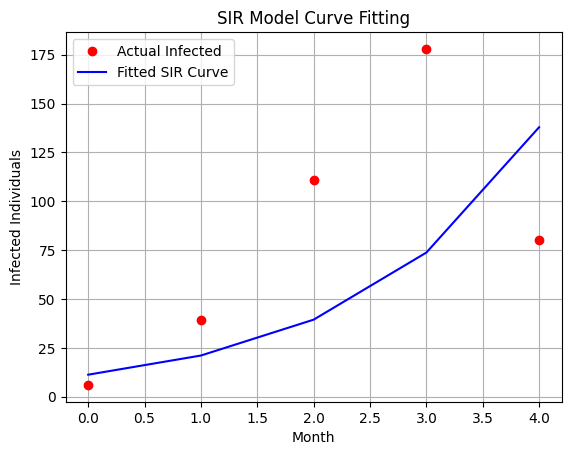

In [2]:
infected_data = np.array([6, 39, 111, 178, 80])
time = np.arange(len(infected_data)) # Time in months: [0, 1, 2, 3, 4]

# Total population
N = 23289

# Initial conditions
I0 = infected_data[0]
R0 = 0
S0 = N - I0 - R0

# Define the SIR model simulation (Euler method)
def sir_model(t, beta, gamma):
    S = S0
    I = I0
    R = R0
    I_list = []

    for _ in t:
        new_infected = beta * S * I / N
        new_recovered = gamma * I

        S -= new_infected
        I += new_infected - new_recovered
        R += new_recovered

        I_list.append(I)

    return np.array(I_list)

# Initial guesses for beta and gamma
initial_guess = [0.2, 0.1] # [beta, gamma]

# Fit the model to data using non-linear least squares
popt, pcov = curve_fit(sir_model, time, infected_data, p0=initial_guess, bounds=(0, [1.0, 1.0]))

# Extract fitted parameters
beta_fit, gamma_fit = popt
print(f"Estimated β (transmission rate): {beta_fit:.4f}")
print(f"Estimated γ (recovery rate): {gamma_fit:.4f}")
print(f"Estimated R₀ (basic reproduction number): {beta_fit / gamma_fit:.2f}")

# Plot actual vs fitted infected counts
fitted_infected = sir_model(time, beta_fit, gamma_fit)
plt.plot(time, infected_data, 'ro', label='Actual Infected')
plt.plot(time, fitted_infected, 'b-', label='Fitted SIR Curve')
plt.xlabel('Month')
plt.ylabel('Infected Individuals')
plt.title('SIR Model Curve Fitting')
plt.legend()
plt.grid(True)
plt.show()

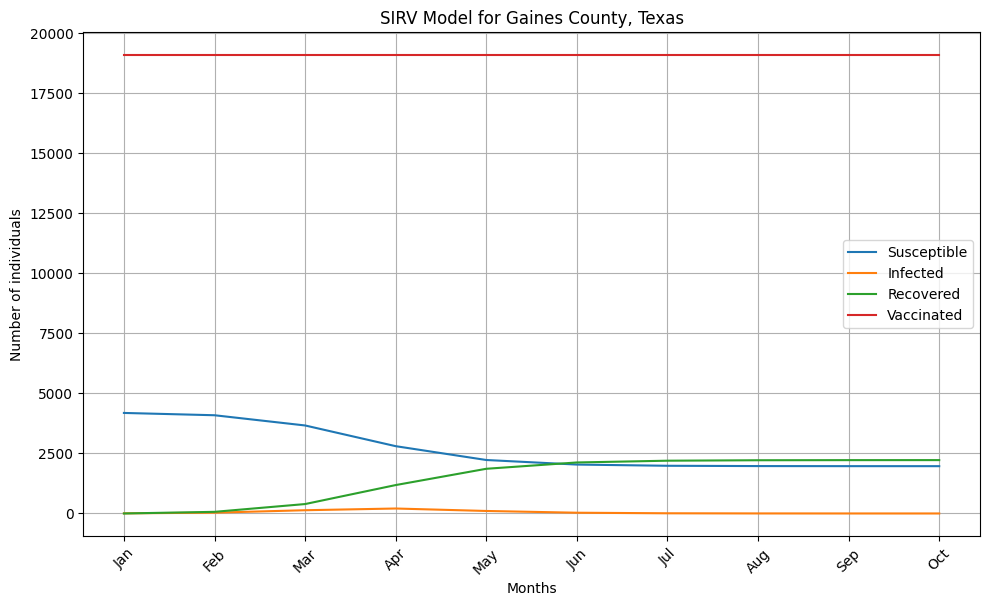

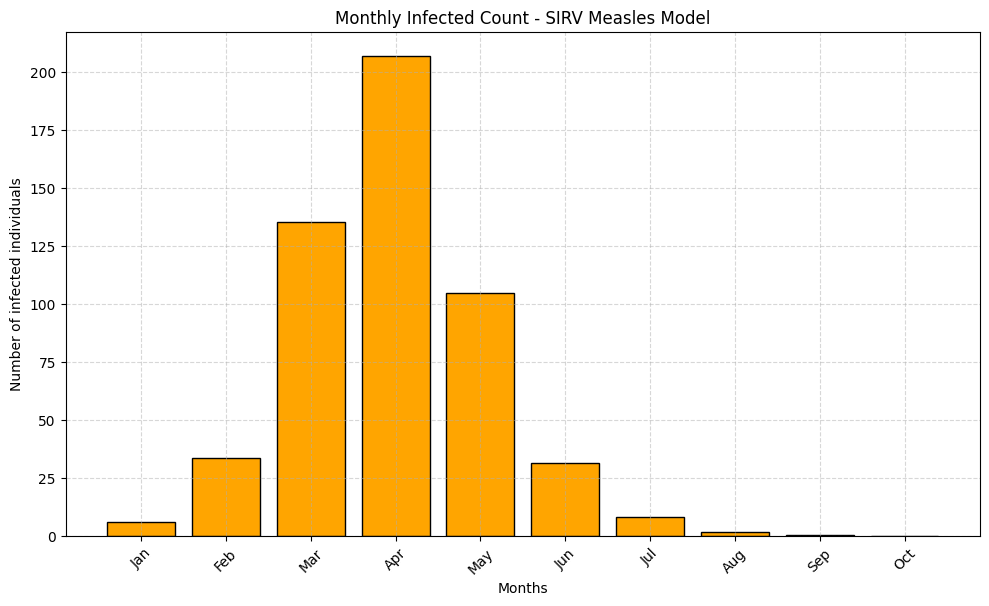

Predicted end of outbreak: Day 266
528.721331277494


In [2]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import os
from datetime import datetime, timedelta
# Ensure output directory


# SIRV model
def sirv_model(y, t, beta, gamma, nu):
    S, I, R, V = y
    N = S + I + R + V
    dSdt = -beta * S * I / N - nu * S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    dVdt = nu * S
    return [dSdt, dIdt, dRdt, dVdt]

# Initial conditions for Gaines County
N = 23289

I0 = 6
R0 = 0
V0 = int(0.82*N)
S0 = N - I0 - R0 - V0

# Parameters per month
beta = 1.0 # Infection rate
gamma = 0.1266 # Recovery rate
v_rate = 0.000
# Vaccination rates per month
t = np.linspace(0,300,10)
result = odeint(sirv_model,[S0,I0,R0,V0], t, args=(beta,gamma,v_rate))
S,I,R,V = result.T

start_date = datetime(2025,1,1)
month_names = [(start_date + timedelta(days=int(day))).strftime('%b')for day in t]
indices = np.arange(len(t))





plt.figure(figsize=(10, 6))
plt.plot(indices, S, label = 'Susceptible')
plt.plot(indices, I, label='Infected')
plt.plot(indices, R, label='Recovered')
plt.plot(indices, V, label='Vaccinated')
plt.xlabel('Months')
plt.ylabel('Number of individuals')
plt.title('SIRV Model for Gaines County, Texas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(indices, month_names,rotation=45)
plt.show()

# Plot 2: ML-Predicted Outbreak Duration
plt.figure(figsize=(10,6))
plt.bar(indices,I,width=0.8,color='orange',edgecolor='black')
plt.xlabel('Months')
plt.ylabel('Number of infected individuals')
plt.title('Monthly Infected Count - SIRV Measles Model')
plt.grid(True,linestyle='--', alpha = 0.5)
plt.tight_layout()
plt.xticks(indices,month_names,rotation=45)
plt.show()

infected1 = 0
for day,infected in zip(t,I):
    infected1=infected1+infected
    if infected < 1:
        print(f"Predicted end of outbreak: Day {int(day)}")
        break
print(infected1)